In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import FunctionTransformer

In [107]:
# By using real data - sklearn

dataset=pd.read_csv("student_habits_performance.csv")
dataset.head(6)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3
3,S1003,23,Female,1.0,3.9,1,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4
5,S1005,24,Male,7.2,1.3,0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0


In [84]:
dataset.isnull().sum()

student_id                        0
age                               0
gender                            3
study_hours_per_day               0
social_media_hours                3
netflix_hours                     0
part_time_job                     2
attendance_percentage             0
sleep_hours                       0
diet_quality                      2
exercise_frequency                0
parental_education_level         93
internet_quality                  2
mental_health_rating              0
extracurricular_participation     1
exam_score                        0
dtype: int64

In [85]:
# dataset["netflix_hours"].value_counts()
dataset["netflix_hours"].value_counts()['300.4+']

np.int64(3)

In [86]:
dataset["netflix_hours"] = dataset["netflix_hours"].replace('300.4+', '300.4')
dataset["netflix_hours"]=dataset["netflix_hours"].astype("float64")
dataset.head(13)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16916\3656471360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["netflix_hours"])


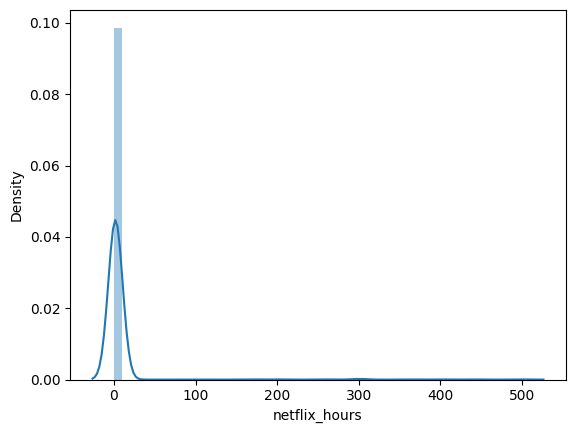

In [87]:
sns.distplot(dataset["netflix_hours"])
plt.show()

In [88]:
#Remove outlier using IQR 

q1=dataset["netflix_hours"].quantile(0.25)
q3=dataset["netflix_hours"].quantile(0.75)
iqr=q3-q1
iqr

np.float64(1.6)

In [89]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range, max_range

(np.float64(-1.4000000000000004), np.float64(5.0))

In [96]:
# dataset=dataset[dataset["netflix_hours"]<=max_range] -> check without outlier & with outlier
# then again check the graph

In [97]:
#convert into 'normal distribution' using function transformer

ft = FunctionTransformer(func=np.log1p)
ft.fit(dataset[["netflix_hours"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [101]:
dataset["log_netflix_hours"] = ft.transform(dataset[["netflix_hours"]])
dataset.head(6)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,log_netflix_hours,X**2_netflix_hours
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,0.741937,1.21
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0,1.193922,5.29
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3,0.832909,1.69
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8,0.693147,1.00
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4,0.405465,0.25
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0,0.000000,0.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_16916\279233002.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["netflix_hours"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16916\279233002.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["log_netflix_hours"])


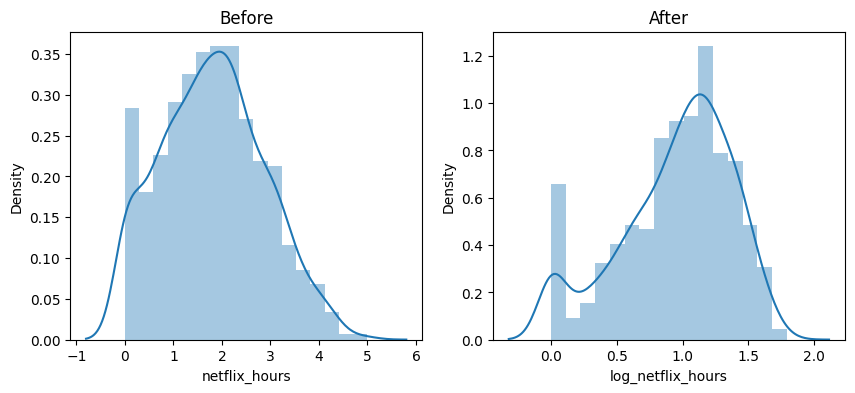

In [102]:
# nature check -> same or different
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) # (row, col, position)
plt.title("Before")
sns.distplot(dataset["netflix_hours"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["log_netflix_hours"])
plt.show()

In [103]:
ft1 = FunctionTransformer(func=lambda x:x**2)
ft1.fit(dataset[["netflix_hours"]])
dataset["X**2_netflix_hours"] = ft1.transform(dataset[["netflix_hours"]])
dataset.head(6)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,log_netflix_hours,X**2_netflix_hours
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,0.741937,1.21
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0,1.193922,5.29
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3,0.832909,1.69
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8,0.693147,1.00
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4,0.405465,0.25
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0,0.000000,0.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_16916\1113817998.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["netflix_hours"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16916\1113817998.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["X**2_netflix_hours"])


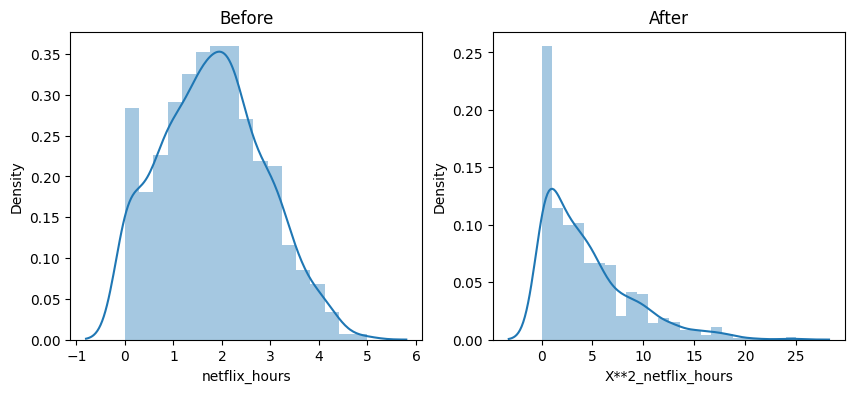

In [104]:
# nature check -> same or different
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) # (row, col, position)
plt.title("Before")
sns.distplot(dataset["netflix_hours"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["X**2_netflix_hours"])
plt.show()